In [1]:
# Import semua library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Library untuk dataset tidak seimbang
from imblearn.over_sampling import SMOTE

# Biar grafik tampil bagus
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("✅ Semua library berhasil di-import!")


✅ Semua library berhasil di-import!


In [3]:
import os
os.chdir(r"D:\Capstone\Capstone-Project-XAI\Dataset")

print("✅ Lokasi sudah diubah ke:", os.getcwd())


✅ Lokasi sudah diubah ke: D:\Capstone\Capstone-Project-XAI\Dataset


In [6]:
import pandas as pd


In [7]:
# Membaca dataset yang kamu upload
df = pd.read_csv("stroke_dataset.csv")

# Melihat 5 data teratas
print("📋 5 Data Teratas:")
display(df.head())

# Cek informasi kolom dan tipe datanya
print("\n🧩 Info Dataset:")
print(df.info())

# Cek apakah ada data kosong
print("\n🔍 Jumlah Data Kosong per Kolom:")
print(df.isnull().sum())

📋 5 Data Teratas:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



🧩 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

🔍 Jumlah Data Kosong per Kolom:
id                     0
gender                 0
age                    0
hypertension           0
he

In [8]:
# 1️⃣ Cek jumlah nilai unik di tiap kolom kategorikal
print("🔢 Nilai unik di setiap kolom kategorikal:\n")
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(f"{col}: {df[col].unique()}")

# 2️⃣ Tangani missing value pada kolom BMI
# Ganti nilai kosong dengan median (karena distribusi BMI sering tidak normal)
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# 3️⃣ Pastikan tidak ada missing value lagi
print("\n✅ Data kosong setelah cleaning:")
print(df.isnull().sum())

# 4️⃣ Cek ringkasan statistik awal
print("\n📈 Ringkasan statistik numerik:")
display(df.describe())


🔢 Nilai unik di setiap kolom kategorikal:

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

✅ Data kosong setelah cleaning:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

📈 Ringkasan statistik numerik:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10636\3582418578.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


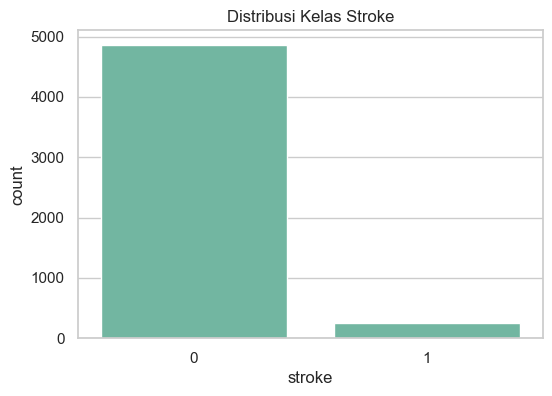

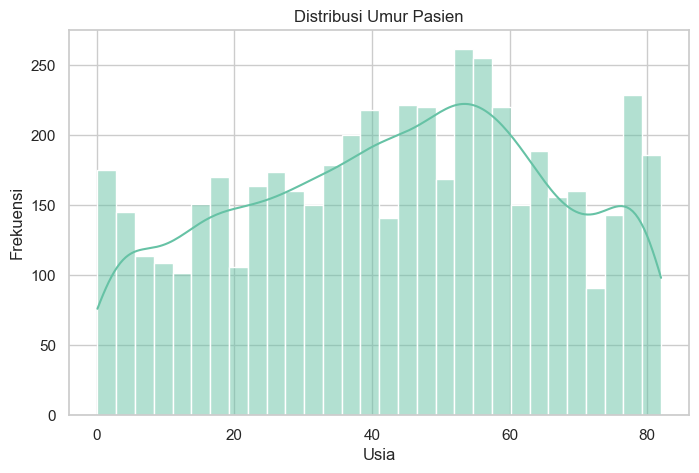

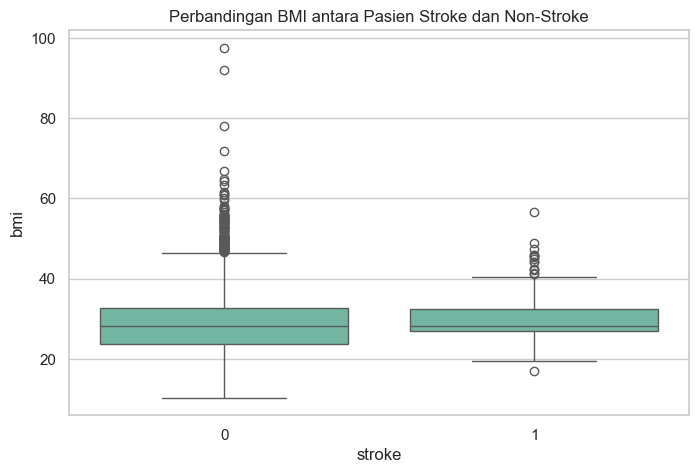

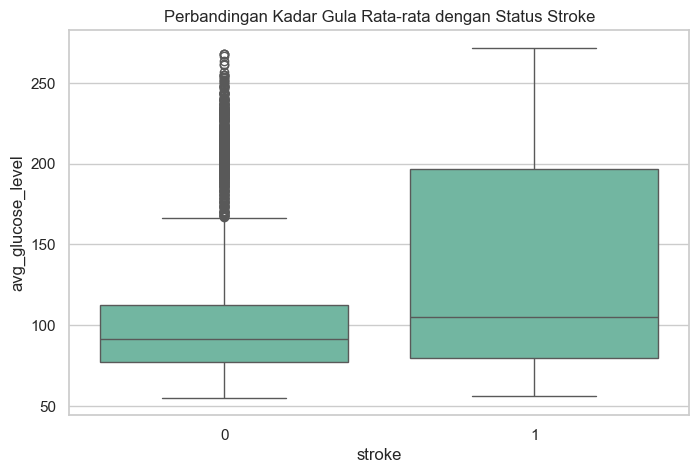

In [9]:
# === VISUALISASI EDA ===

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

# 1️⃣ Distribusi target (stroke vs non-stroke)
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df)
plt.title('Distribusi Kelas Stroke')
plt.show()

# 2️⃣ Distribusi umur
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# 3️⃣ Distribusi BMI
plt.figure(figsize=(8,5))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('Perbandingan BMI antara Pasien Stroke dan Non-Stroke')
plt.show()

# 4️⃣ Hubungan kadar gula dan stroke
plt.figure(figsize=(8,5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Perbandingan Kadar Gula Rata-rata dengan Status Stroke')
plt.show()


In [10]:
# === PREPROCESSING DATA ===

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Salin dataset asli
data = df.copy()

# 1️⃣ Label encoding untuk kolom kategorikal (jika ada)
# Misal kolom: gender, ever_married, work_type, Residence_type, smoking_status
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# 2️⃣ Pisahkan fitur dan target
X = data.drop('stroke', axis=1)
y = data['stroke']

# 3️⃣ Standarisasi kolom numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Split data menjadi train & test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data preprocessing selesai!")
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Data preprocessing selesai!
Ukuran data latih: (4088, 11)
Ukuran data uji: (1022, 11)


In [11]:
df.to_csv("stroke_cleaned.csv", index=False)
